# Problem 3
hinge loss + L2正則化

## 理論
学習データを$(x_i, y_i)_{i=1}^n,\  x_i\in \mathbb{R}^d,\ y_i\in \{-1,1\}$とする。 

$$J\colon \mathbb{R}^d\to \mathbb{R}$$
$$J(w) = \sum_{i=1}^n \max(0, 1 - y_iw^\top x_i) + \lambda \lVert w\rVert^2_2$$
としたとき、

$$\hat{w} = \arg\min_{w\in \mathbb{R}^d} J(w)$$
が最適なパラメータである。
この最適化問題は微分不可能な点があってそのままだと難しいので、スラック変数$\xi\in \mathbb{R}^d$を導入して、

\begin{align}
  \text{minimize}_{w, \xi\in \mathbb{R}^d}\qquad &1^\top \xi + \lambda w^\top w\\
  \text{subject to}\qquad &\xi_i\geq 1 - y_i w^\top x_i\qquad (i=1,2,\ldots n)\\
                          &\xi\geq 0
\end{align}
と書ける。


上記の最適化問題のラグランジアン $L\colon \mathbb{R}^d\times \mathbb{R}^d \times \mathbb{R}_{\geq 0}^n \times \mathbb{R}_{\geq 0}^n\to \mathbb{R}$は次のようになる。
\begin{equation}
  L(w, \xi, \alpha,\beta ) = 1^\top \xi + \lambda w^\top w + \sum_{i=1}^n \alpha_i(1 - y_i w^\top x_i - \xi_i) - \beta^\top \xi
\end{equation}

KKT条件の$\partial L/ \partial w = 0$から、

$$\hat w = \frac{1}{2\lambda}\sum_{i=1}^n \alpha_i y_i x_i$$
が得られる。

$L$のラグランジュ双対関数を$\tilde{L}\colon \mathbb{R}_{\geq 0}^n \times \mathbb{R}_{\geq 0}^n\to \mathbb{R}\cup\{-\infty\}$とする。つまり、

\begin{equation}
  \tilde{L}(\alpha, \beta) = \inf_{w\in \mathbb{R}^d,\ \xi \in \mathbb{R}^d} L(w, \xi, \alpha,\beta )
\end{equation}
である。

ラグランジュ双対問題は次のように書ける。
\begin{align}
  \text{maximize}_{\alpha \in \mathbb{R}^n}\qquad &-\frac{1}{4\lambda} \alpha^\top K\alpha + \alpha^\top 1\\
  \text{subject to}\qquad &\alpha \in [0,1]^n
\end{align}

ただし、$K\in \mathbb{R}^{n\times n},\ K_{i,j} = y_iy_jx_i^\top x_j$

ラグランジュ双対関数を次のように再定義する。

$$\tilde{L}(\alpha) = -\frac{1}{4\lambda} \alpha^\top K\alpha + \alpha^\top 1$$

ラグランジュ双対問題を最小化問題に書き直すと次のようになる。

\begin{align}
  \text{minimize}_{\alpha \in \mathbb{R}^n}\qquad &-\tilde{L}(\alpha)\\
  \text{subject to}\qquad &\alpha \in [0,1]^n
\end{align}

この最適解を射影勾配法で求める。学習率を$\eta_t$、$P_{[0,1]^n}$を集合$[0,1]^n$への射影作用素とすると、

$$\alpha^{(t+1)} = P_{[0,1]^n}\left(\alpha^{(t)} - \eta_t \left(\frac{1}{2\lambda} K \alpha^{(t)} - 1\right)\right)$$


この最適解$\hat\alpha$を求めて、
$$\hat w = \frac{1}{2\lambda}\sum_{i=1}^n \hat\alpha_i y_i x_i$$
を計算すると、最適パラメータ$\hat w$が得られる。



## データセット
Problem 1と同じものを使用する。

教師データ$(x_i, y_i)_{i=1}^n$
$x_i\in \mathbb{R}^2,\ y_i\in \{-1,1\}$

In [185]:
import numpy as np
import matplotlib.pyplot as plt

In [186]:
from collections import namedtuple
Entry = namedtuple('Entry', ('x', 'y'))

In [187]:
from numpy.random import *

seed(1000) # 再現性のために乱数のシード固定
n= 40
omega = randn(1,1) # 境界線の傾きのようなもの
noise = 0.8 * randn(n,1)

x = randn(n,2)
y = 2 * (omega * x[: , 0:1] + x[: , 1:2]   + noise > 0) - 1
# x[:, 0]だと1次元のベクトルが出てきて、行列演算が適用できない。
# x[:,0:1]とすることで0列目をn行1列の行列として抽出できる。

data = [Entry(elem[0].reshape(2,1), elem[1]) for elem in zip(list(x), list(y))]

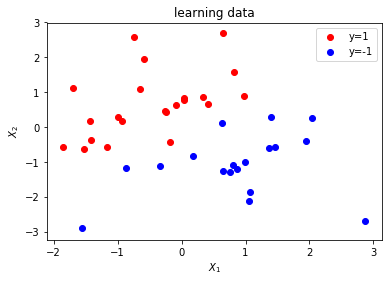

In [188]:
# 学習データをプロットする

# y=-1とy=1でデータセットを分離する

# y=1のデータ
data_p1 = [elem.x for elem in data if elem.y == 1]
# y=-1のデータ
data_m1 = [elem.x for elem in data if elem.y == -1]

# xの第1成分と第2成分を分離
data_p1x1 = [x[0] for x in data_p1]
data_p1x2 = [x[1] for x in data_p1]
data_m1x1 = [x[0] for x in data_m1]
data_m1x2 = [x[1] for x in data_m1]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(data_p1x1,data_p1x2, c='red', label='y=1')
ax.scatter(data_m1x1, data_m1x2, c='blue', label='y=-1')

ax.set_title('learning data')
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.legend(loc='upper right');
fig.savefig('learning_data.png')

## 目的関数(hinge loss + 正則化項)
$$J\colon \mathbb{R}^2\to \mathbb{R}$$
$$J(w) = \sum_{i=1}^n \max(0, 1 - y_iw^\top x_i) + \lambda \lVert w\rVert^2_2$$

$\lambda = 1$とする

In [189]:
lam = 1

In [190]:
# wは2次元
def J(w):
    def f(entry):
        x = entry.x
        y = entry.y
        ywx = y * np.matmul(w.T, x) 
        return np.max((0, 1-ywx))
    return sum([f(entry) for entry in data]) + lam * np.matmul(w.T, w)

## ラグランジュ双対関数
$$\tilde{L}\colon [0,1]^n \to \mathbb{R}$$
$$\tilde{L}(\alpha) = -\frac{1}{4\lambda} \alpha^\top K\alpha + \alpha^\top 1$$

ただし、$K\in \mathbb{R}^{n\times n},\ K_{i,j} = y_iy_jx_i^\top x_j$

In [191]:
# Kの定義
K = np.zeros((n,n))
for i in range(0,n):
    for j in range(0,n):
        yi = data[i].y
        yj = data[j].y
        xi = data[i].x
        xj = data[j].x
        
        K[i][j] = yi * yj * np.matmul(xi.T, xj)

In [192]:
#  alphaはn次元
def lag_dual(alpha):
    return -(1/4 * lam) * np.matmul(np.matmul(alpha.T, K), alpha) + sum(alpha)

## 射影勾配法


\begin{align}
  \text{minimize}_{\alpha \in \mathbb{R}^n}\qquad &-\tilde{L}(\alpha)\\
  \text{subject to}\qquad &\alpha \in [0,1]^n
\end{align}

この最適解を射影勾配法で求める。学習率を$\eta_t$、$P_{[0,1]^n}$を集合$[0,1]^n$への射影作用素とすると、

$$\alpha^{(t+1)} = P_{[0,1]^n}\left(\alpha^{(t)} - \eta_t \left(\frac{1}{2\lambda} K \alpha^{(t)} - 1\right)\right)$$

学習率は$-\tilde{L}$のヘッシアン $(1/2\lambda)K$の最大固有値の逆数とする。

初期値は$\alpha^{(0)} = 0$とする

In [193]:
import numpy.linalg as LA
# 学習率etaの計算
maxeig_K = np.max(LA.eigvalsh(K))
eta = 1/((1/2 * lam) * maxeig_K)

In [194]:
# [0,1]^nへの射影作用素

def proj(alpha):
    result = np.zeros(n)
    for i in range(0,n):
        if alpha[i] < 0:
            result[i] = 0
        elif alpha[i] <1:
            result[i] = alpha[i]
        else:
            result[i] = 1
    return result


In [195]:
#  更新式
def update(alpha):
    return proj(alpha - eta * ((1/2 * lam) * np.matmul(K, alpha) - 1))

In [196]:
# 射影勾配法
numIterations = 100 # 100回だと足りなそう。
alpha_list = []
alpha0 = np.zeros((n, 1))
alpha_list.append(alpha0)

for i in range(1, numIterations):
    alpha_old = alpha_list[i-1]
    alpha_new = update(alpha_old)
    alpha_list.append(alpha_new)

alpha_result = alpha_list[-1] # 射影勾配法の結果


## 最適パラメータの導出
更新途中の$\alpha^{(t)}$を用いて計算されたパラメータを$\hat w^{(t)}$とする。
$$\hat w^{(t)} = \frac{1}{2\lambda}\sum_{i=1}^n \alpha^{(t)}_i y_i x_i$$
$$\hat w = \frac{1}{2\lambda}\sum_{i=1}^n \hat\alpha_i y_i x_i$$

In [197]:
def g(entry):
    alpha = entry[0]
    x = entry[1].x
    y = entry[1].y
    return alpha * y * x

w_list = []
for alpha in alpha_list:
    w = (1/2 * lam) * sum([g(entry) for entry in zip(list(alpha), data)])
    w_list.append(w)

w_result = w_list[-1]


In [198]:
# 最適パラメータ
w_result

array([[-1.07763133],
       [ 1.40373721]])

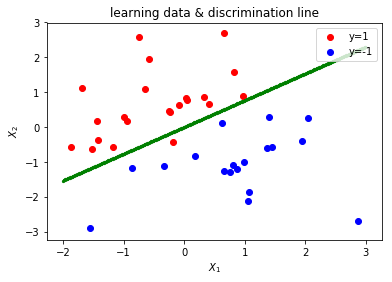

In [199]:
# 学習データ + 識別線

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# 学習データ
ax.scatter(data_p1x1,data_p1x2, c='red', label='y=1')
ax.scatter(data_m1x1, data_m1x2, c='blue', label='y=-1')

ax.set_title('learning data & discrimination line')
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.legend(loc='upper right');

# 識別線
linex = np.arange(-2,3,0.01)
# w1*x + w2*y = 0より、y = -(w1/w2)x が識別線
liney = -w_result[0]/w_result[1] * linex
ax.scatter(linex, liney,c='green', s=5);

正しく識別できたことが確認できた。

## 結果の解析
$(\tilde{L}(\alpha^{(t)}))_t$の収束の確認

In [200]:
lag_dual_alpha_list = [lag_dual(alpha) for alpha in alpha_list]

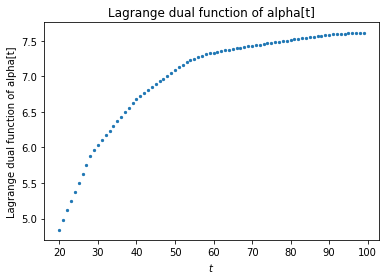

In [201]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(range(20, numIterations), lag_dual_alpha_list[20: numIterations], s=5)

ax.set_title('Lagrange dual function of alpha[t]')
ax.set_xlabel('$t$')
ax.set_ylabel('Lagrange dual function of alpha[t]');


$(J(\hat{w}^{(t)}))_t$の収束の確認

In [202]:
jw_list = [J(w) for w in w_list]

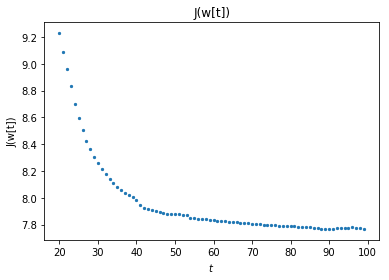

In [203]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(range(20, numIterations), jw_list[20: numIterations], s=5)

ax.set_title('J(w[t])')
ax.set_xlabel('$t$')
ax.set_ylabel('J(w[t])');

双対ギャップ$(J(\hat{w}^{(t)})-\tilde{L}(\alpha^{(t)}))_t$が$0$に収束することの確認

In [204]:
dual_gap = [jw_list[i] - lag_dual_alpha_list[i] for i in range(0, numIterations)]

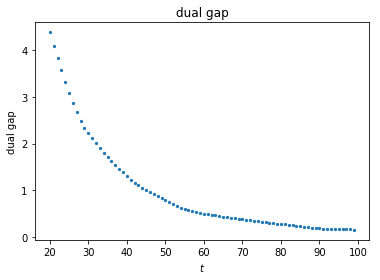

In [205]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(range(20, numIterations), dual_gap[20:numIterations], s=5)

ax.set_title('dual gap')
ax.set_xlabel('$t$')
ax.set_ylabel('dual gap');